In [1]:
### Models should be auto-loaded in shell_plus kernel
# from tst.models import * 

In [10]:
# q = classification.objects.filter(Class=1,arch=10,topo=10,homsf=10,s35=0)
# classification.objects
classification.homsf_objects.count()
# homsf = classification.objects.exclude(homsf=0).filter(s35=0);
d = domain.objects.all()[0]
s = d.classification
sf = s.parent
sf.classification_set.all()

# homsf_list = 

<QuerySet [<classification: 1.10.8.10.1.0>, <classification: 1.10.8.10.2.0>, <classification: 1.10.8.10.3.0>, <classification: 1.10.8.10.4.0>, <classification: 1.10.8.10.5.0>, <classification: 1.10.8.10.6.0>, <classification: 1.10.8.10.7.0>, <classification: 1.10.8.10.8.0>, <classification: 1.10.8.10.9.0>, <classification: 1.10.8.10.10.0>, <classification: 1.10.8.10.11.0>, <classification: 1.10.8.10.12.0>, <classification: 1.10.8.10.13.0>, <classification: 1.10.8.10.14.0>, <classification: 1.10.8.10.15.0>, <classification: 1.10.8.10.16.0>, <classification: 1.10.8.10.17.0>, <classification: 1.10.8.10.18.0>, <classification: 1.10.8.10.19.0>, <classification: 1.10.8.10.20.0>, '...(remaining elements truncated)...']>

In [110]:
domain.objects.get(domain_id = '4aimA04').classification

<classification: 2.40.50.140.147.0>

In [27]:
import matplotlib.pyplot as plt

import numpy as np

(0, 100)

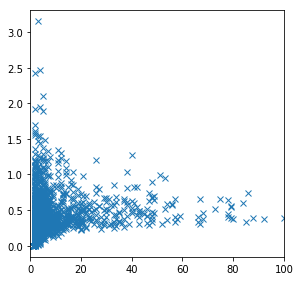

In [92]:
homsfs = classification.homsf_objects.all()
%matplotlib inline

xs = [];
ys = [];
for hom in homsfs:
    xs.append(hom.s35_count)
    ys.append(hom.nDOPE_std)
plt.close("all")
fig = plt.figure(figsize = [10,10])
# ax1 = fig.add_subplot(111)

ax1 = fig.add_subplot(221)
ax1.plot(xs,ys,'x',3)
ax1.set_xlim([0,100])
#     plot()

In [103]:

def plot_homsf(homsf_id, ax = None,ax2 = None):

#     homsf_id = "2.10.25.10"
#     homsf_id = "3.30.200.20"
    # homsf_id = "2.40.50.140"
    lst = ( x for x in homsf_id.split('.'))
    homsf = classification.objects.get(Class=next(lst,None),
                                arch=next(lst,None),
                                topo=next(lst,None),
                                homsf=next(lst,None),
                                s35=next(lst,0),)


    s35set = homsf.classification_set.all()

    plist = [];
    for s35 in s35set:
        d = s35.domain_set.all()[0];
    #     print( d.domain_length)
        plist.append([d.domain_length, d.nDOPE])
    outs = is_outlier([y for x,y in plist]);
    

    pData=np.array(plist);
#     ax.plot(pData[:,0],pData[:,1],'x',1, label = homsf_id)
    outData = [];
    for point,out in zip(plist,outliers):
        if out:
            outData.append(point)
            
    
    ax.scatter(pData[:,0],pData[:,1],label = homsf_id)
    ax.scatter(outData[:,0],outData[:,1],label = homsf_id+'_outlier','x')
    
    ax.set_ylim([-3,3])
    ax2.hist(pData[:,1],np.linspace(-3,3,50), label = homsf_id, alpha = 0.5)

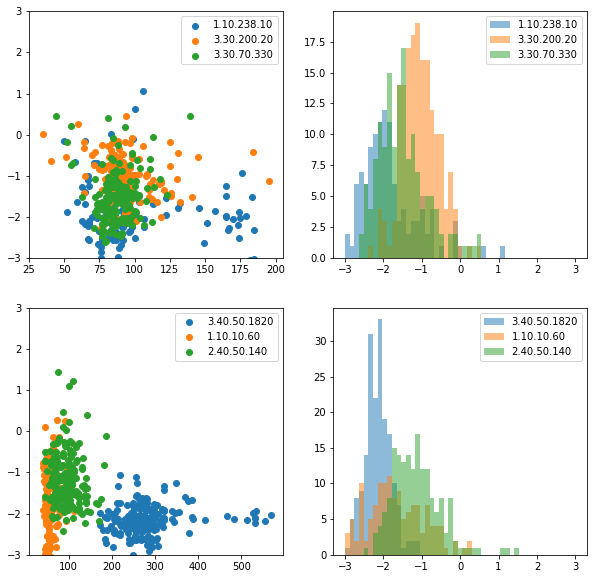

In [146]:
%matplotlib inline
plt.close("all")
fig = plt.figure(figsize = [10,10])
# ax1 = fig.add_subplot(111)

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

plot_homsf("1.10.238.10",ax1,ax2)
plot_homsf("3.30.200.20",ax1,ax2)
plot_homsf("3.30.70.330",ax1,ax2)
plot_homsf("3.40.50.1820",ax3,ax4)
plot_homsf("1.10.10.60",ax3,ax4)
plot_homsf("2.40.50.140",ax3,ax4)
for ax in [ax1,ax2,ax3,ax4]:
    ax.legend()

# plot_homsf("2.30.29.30",ax3)
# plot_homsf("3.30.200.20",ax3)
# plot_homsf("2.40.50.140",ax3)
# plot_homsf("2.30.30.40",ax4)
# plot_homsf("2.60.120.10",ax4)
# plot_homsf("2.40.10.10",ax4)
#     #     print(d.nDOPE)

# dset.nDOPE

In [93]:
%matplotlib inline
homsfs = classification.homsf_objects.all().filter(s35_count__gte=100).order_by("-nDOPE_std")

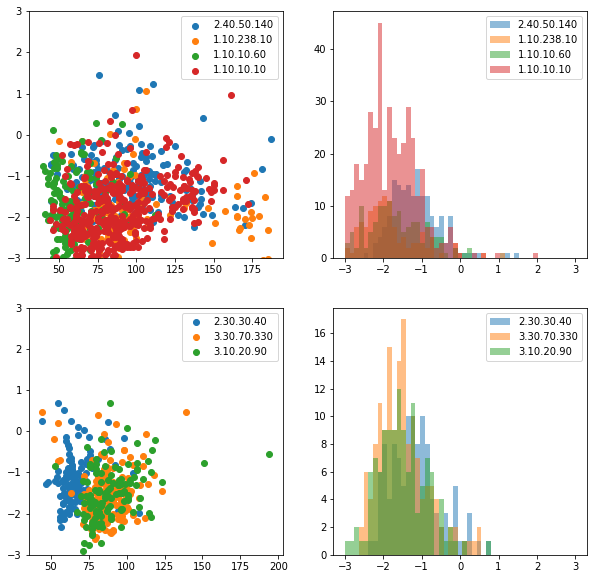

In [105]:
plt.close("all")
fig = plt.figure(figsize = [10,10])
# ax1 = fig.add_subplot(111)

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ilst = xrange(0,4);
for i in ilst:
    plot_homsf(homsfs[i].superfamily(),ax1,ax2)
ilst = xrange(5,8);
for i in ilst:
    plot_homsf(homsfs[i].superfamily(),ax3,ax4)


for ax in [ax1,ax2,ax3,ax4]:
    ax.legend()

# plot_homsf("2.30.29.30",ax3)
# plot_homsf("3.30.200.20",ax3)
# plot_homsf("2.40.50.140",ax3)
# plot_homsf("2.30.30.40",ax4)
# plot_homsf("2.60.120.10",ax4)
# plot_homsf("2.40.10.10",ax4)
#     #     print(d.nDOPE)

# dset.nDOPE

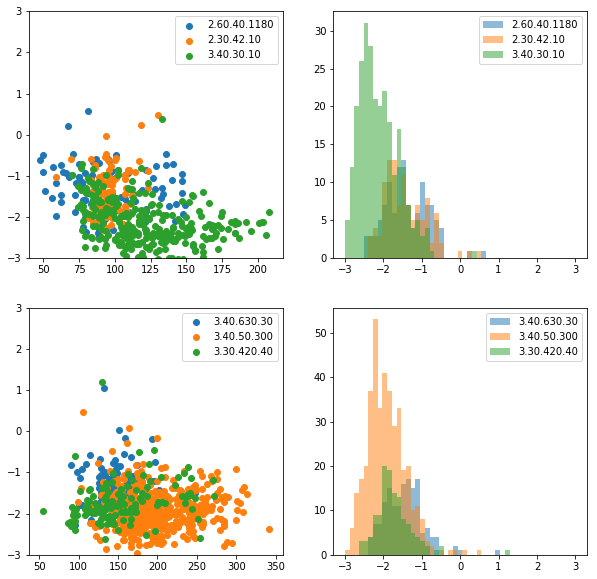

In [106]:
plt.close("all")
fig = plt.figure(figsize = [10,10])
# ax1 = fig.add_subplot(111)

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ilst = xrange(9,12);
for i in ilst:
    plot_homsf(homsfs[i].superfamily(),ax1,ax2)
ilst = xrange(13,16);
for i in ilst:
    plot_homsf(homsfs[i].superfamily(),ax3,ax4)


for ax in [ax1,ax2,ax3,ax4]:
    ax.legend()

# plot_homsf("2.30.29.30",ax3)
# plot_homsf("3.30.200.20",ax3)
# plot_homsf("2.40.50.140",ax3)
# plot_homsf("2.30.30.40",ax4)
# plot_homsf("2.60.120.10",ax4)
# plot_homsf("2.40.10.10",ax4)
#     #     print(d.nDOPE)

# dset.nDOPE

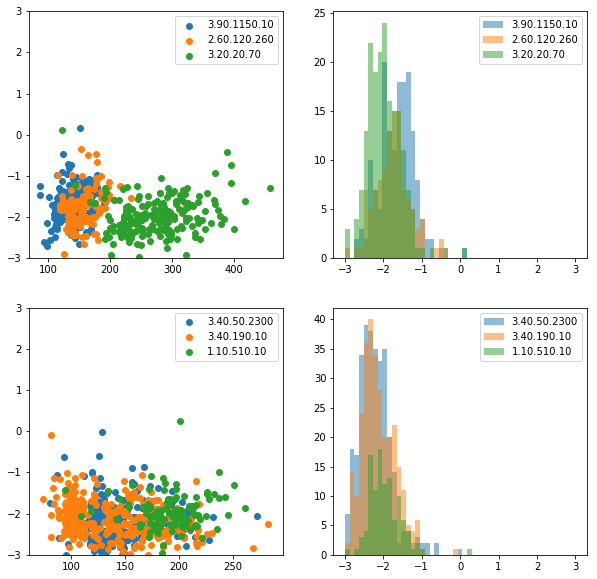

In [107]:
plt.close("all")
fig = plt.figure(figsize = [10,10])
# ax1 = fig.add_subplot(111)

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ilst = xrange(17,20);
for i in ilst:
    plot_homsf(homsfs[i].superfamily(),ax1,ax2)
ilst = xrange(21,24);
for i in ilst:
    plot_homsf(homsfs[i].superfamily(),ax3,ax4)


for ax in [ax1,ax2,ax3,ax4]:
    ax.legend()

# plot_homsf("2.30.29.30",ax3)
# plot_homsf("3.30.200.20",ax3)
# plot_homsf("2.40.50.140",ax3)
# plot_homsf("2.30.30.40",ax4)
# plot_homsf("2.60.120.10",ax4)
# plot_homsf("2.40.10.10",ax4)
#     #     print(d.nDOPE)

# dset.nDOPE

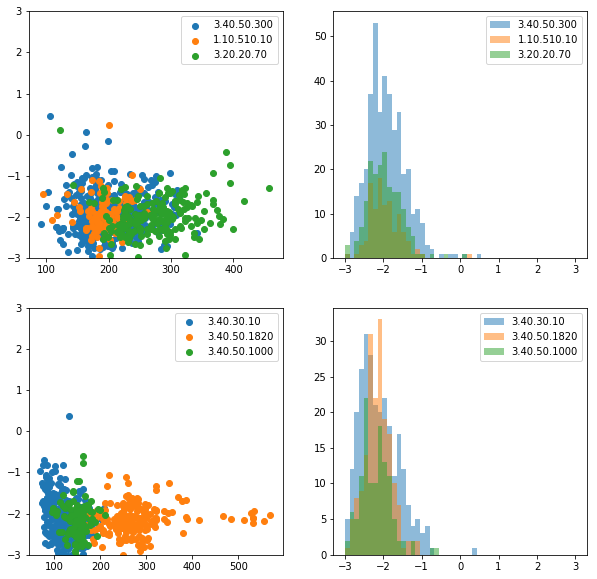

In [112]:
plt.close("all")
fig = plt.figure(figsize = [10,10])
# ax1 = fig.add_subplot(111)

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ilst = xrange(25,28);
for i in ilst:
    plot_homsf(homsfs[i].superfamily(),ax1,ax2)
ilst = xrange(29,32);
for i in ilst:
    plot_homsf(homsfs[i].superfamily(),ax3,ax4)


for ax in [ax1,ax2,ax3,ax4]:
    ax.legend()

# plot_homsf("2.30.29.30",ax3)
# plot_homsf("3.30.200.20",ax3)
# plot_homsf("2.40.50.140",ax3)
# plot_homsf("2.30.30.40",ax4)
# plot_homsf("2.60.120.10",ax4)
# plot_homsf("2.40.10.10",ax4)
#     #     print(d.nDOPE)

# dset.nDOPE

In [126]:
%matplotlib inline
homsfs = classification.homsf_objects.all().filter(s35_count__lte=100,s35_count__gte=50).order_by("-nDOPE_avg")
# homsfs = classification.homsf_objects.all().filter(s35_count__gte=100)


print(len(homsfs))

34


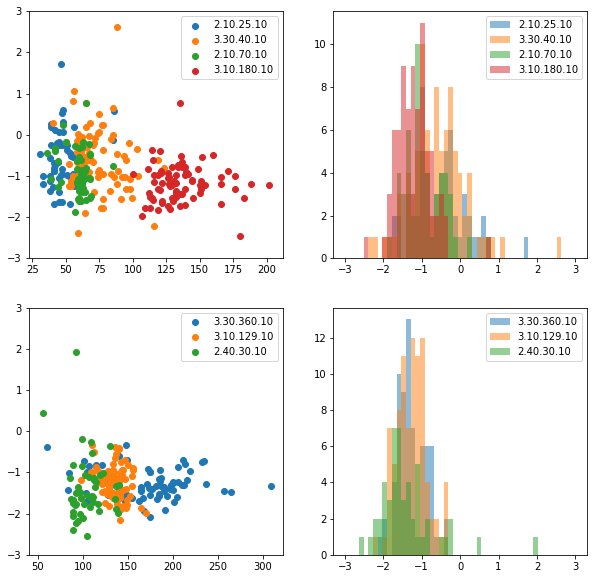

In [130]:
plt.close("all")
fig = plt.figure(figsize = [10,10])
# ax1 = fig.add_subplot(111)

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ilst = xrange(0,4);
for i in ilst:
    plot_homsf(homsfs[i].superfamily(),ax1,ax2)
ilst = xrange(5,8);
for i in ilst:
    plot_homsf(homsfs[i].superfamily(),ax3,ax4)


for ax in [ax1,ax2,ax3,ax4]:
    ax.legend()

# plot_homsf("2.30.29.30",ax3)
# plot_homsf("3.30.200.20",ax3)
# plot_homsf("2.40.50.140",ax3)
# plot_homsf("2.30.30.40",ax4)
# plot_homsf("2.60.120.10",ax4)
# plot_homsf("2.40.10.10",ax4)
#     #     print(d.nDOPE)

# dset.nDOPE

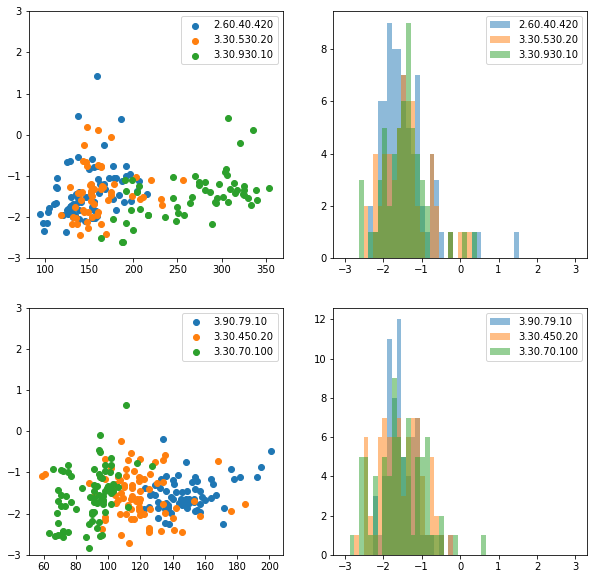

In [145]:
plt.close("all")
fig = plt.figure(figsize = [10,10])
# ax1 = fig.add_subplot(111)

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ilst = xrange(9,12);
for i in ilst:
    plot_homsf(homsfs[i].superfamily(),ax1,ax2)
ilst = xrange(13,16);
for i in ilst:
    plot_homsf(homsfs[i].superfamily(),ax3,ax4)


for ax in [ax1,ax2,ax3,ax4]:
    ax.legend()

# plot_homsf("2.30.29.30",ax3)
# plot_homsf("3.30.200.20",ax3)
# plot_homsf("2.40.50.140",ax3)
# plot_homsf("2.30.30.40",ax4)
# plot_homsf("2.60.120.10",ax4)
# plot_homsf("2.40.10.10",ax4)
#     #     print(d.nDOPE)

# dset.nDOPE

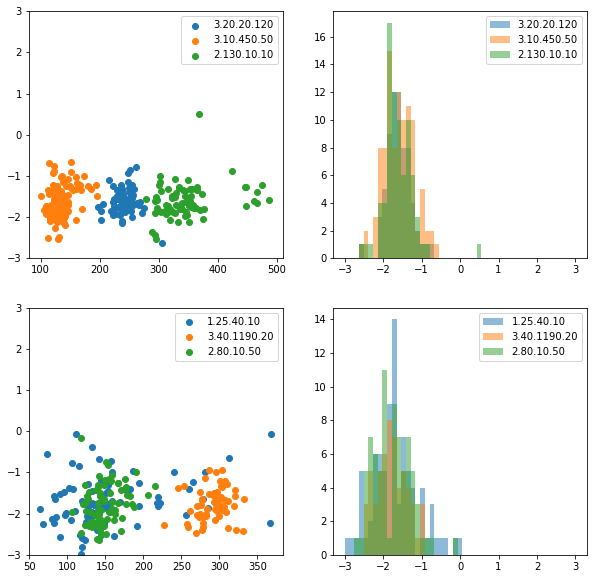

In [131]:
plt.close("all")
fig = plt.figure(figsize = [10,10])
# ax1 = fig.add_subplot(111)

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ilst = xrange(17,20);
for i in ilst:
    plot_homsf(homsfs[i].superfamily(),ax1,ax2)
ilst = xrange(21,24);
for i in ilst:
    plot_homsf(homsfs[i].superfamily(),ax3,ax4)


for ax in [ax1,ax2,ax3,ax4]:
    ax.legend()

# plot_homsf("2.30.29.30",ax3)
# plot_homsf("3.30.200.20",ax3)
# plot_homsf("2.40.50.140",ax3)
# plot_homsf("2.30.30.40",ax4)
# plot_homsf("2.60.120.10",ax4)
# plot_homsf("2.40.10.10",ax4)
#     #     print(d.nDOPE)

# dset.nDOPE

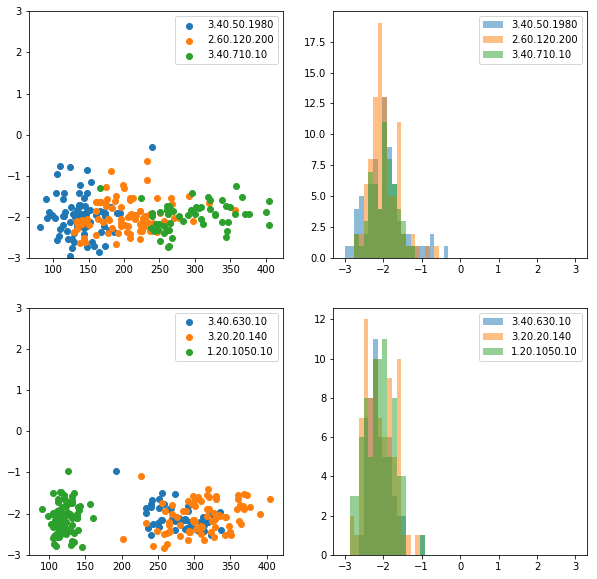

In [132]:
plt.close("all")
fig = plt.figure(figsize = [10,10])
# ax1 = fig.add_subplot(111)

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ilst = xrange(25,28);
for i in ilst:
    plot_homsf(homsfs[i].superfamily(),ax1,ax2)
ilst = xrange(29,32);
for i in ilst:
    plot_homsf(homsfs[i].superfamily(),ax3,ax4)


for ax in [ax1,ax2,ax3,ax4]:
    ax.legend()

# plot_homsf("2.30.29.30",ax3)
# plot_homsf("3.30.200.20",ax3)
# plot_homsf("2.40.50.140",ax3)
# plot_homsf("2.30.30.40",ax4)
# plot_homsf("2.60.120.10",ax4)
# plot_homsf("2.40.10.10",ax4)
#     #     print(d.nDOPE)

# dset.nDOPE

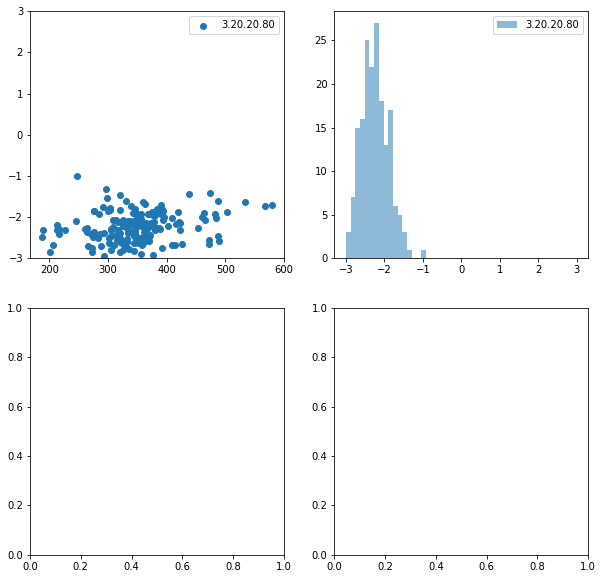

In [120]:
plt.close("all")
fig = plt.figure(figsize = [10,10])
# ax1 = fig.add_subplot(111)

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ilst = xrange(33,34);
for i in ilst:
    plot_homsf(homsfs[i].superfamily(),ax1,ax2)
# ilst = xrange(37,40);
# for i in ilst:
#     plot_homsf(homsfs[i].superfamily(),ax3,ax4)


for ax in [ax1,ax2,ax3,ax4]:
    ax.legend()

# plot_homsf("2.30.29.30",ax3)
# plot_homsf("3.30.200.20",ax3)
# plot_homsf("2.40.50.140",ax3)
# plot_homsf("2.30.30.40",ax4)
# plot_homsf("2.60.120.10",ax4)
# plot_homsf("2.40.10.10",ax4)
#     #     print(d.nDOPE)

# dset.nDOPE

In [119]:
len(homsfs)

34

In [6]:
#!/usr/bin/env python
from modeller import *
from modeller.scripts import complete_pdb

import argparse
import os
from os.path import join

import matplotlib.pyplot as plt
import numpy as np
env = environ()
env.edat.dynamic_sphere = False
env.libs.topology.read(file='$(LIB)/top_heav.lib')
env.libs.parameters.read(file='$(LIB)/par.lib')
env.io.atom_files_directory = ['.','../atom_files','/home/shouldsee/Documents/repos/cathdb/domchop/pdbs/high_dope/']




read_to_681_> topology.submodel read from topology file:        3


In [143]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if not isinstance(points,np.ndarray):
        points = np.array(points)
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [144]:
# len(mdl.residues)
is_outlier([1,3,4,5])
# type(np.array([]))
# isinstance(np.array([1]),np.ndarray)

array([False, False, False, False], dtype=bool)

In [52]:
pdbfile = '2je6I02.pdb'

class pdb():
    def __init__(self,pdbfile = None):
        self.pdbfile = pdbfile
        self.DOPE_profile = None;
        self.nDOPE_profile = None
        self.pdbname = os.path.basename(pdbfile);
        
        if self.pdbname.split('.')[-1]=='pdb':    
            pass
        else:
            raise "not a valid .pdb file"
        self.mdl = complete_pdb(env, self.pdbfile)
        self.delim = "\n\n//Testing structure from %s, containing %d residues" % (self.pdbfile, len(self.mdl.residues))
#         if self.pdbname.split('.')[-1]=='pdb':
        
    def get_DOPE_profile(self):
        print(self.delim)
        #         print("\n\n//Testing structure from %s" % self.pdbfile)
        sel = selection(self.mdl)
        profile = sel.get_dope_profile()

        # profile = mdl.get_normalized_dope_profile()

        res_energy = [x.energy for x in profile];
        factor = 10 ** ( 
            int(
                np.log10(
                    max( 
                        (abs(x) for x in res_energy)
                        ) 
                    )
                - 3  
               )  + 1 
            )
        self.DOPE_profile = res_energy;
        msg = "%s got a DOPE of %f" % (self.pdbname, np.sum(self.DOPE_profile))
        print(msg)
    def get_DOPEhr_profile(self):
        print(self.delim)
        
#         print("\n\n//Testing structure from %s" % self.pdbfile)
        sel = selection(self.mdl)
        profile = sel.get_dopehr_profile()

        # profile = mdl.get_normalized_dope_profile()

        res_energy = [x.energy for x in profile];
        factor = 10 ** ( 
            int(
                np.log10(
                    max( 
                        (abs(x) for x in res_energy)
                        ) 
                    )
                - 3  
               )  + 1 
            )
        self.DOPEhr_profile = res_energy;
        msg = "%s got a DOPE of %f" % (self.pdbname, np.sum(self.DOPEhr_profile))
        print(msg)

    def get_nDOPE_profile(self):
        print(self.delim)
        
#         print("\n\n//Testing structure from %s" % self.pdbfile)
        
        profile = self.mdl.get_normalized_dope_profile()

        res_energy = [x.energy for x in profile];
        factor = 10 ** ( 
            int(
                np.log10(
                    max( 
                        (abs(x) for x in res_energy)
                        ) 
                    )
                - 3  
               )  + 1 
            )
        self.nDOPE_profile = res_energy;
        msg = "%s got an average nDOPE of %f" % (self.pdbname, np.mean(self.nDOPE_profile))
        print(msg)

    
# print(len(profile))

# np.sum(res_energy)

p1 = pdb('2je6I02.pdb')
p2 = pdb('4aimA04.pdb')
for p in [p1,p2]:
    p.get_DOPE_profile()
    p.get_nDOPE_profile()
np.sum(p1.DOPE_profile)



//Testing structure from 2je6I02.pdb, containing 88 residues
iatmcls_286W> MODEL atom not classified:  SER:OXT  SER
preppdf_453W> No fixed restraints selected; there may be some dynamic ones.
preppdf_454W> Restraints file was probably not read; use restraints.append().
2je6I02.pdb got a DOPE of -7407.044140


//Testing structure from 2je6I02.pdb, containing 88 residues
iatmcls_286W> MODEL atom not classified:  SER:OXT  SER
preppdf_453W> No fixed restraints selected; there may be some dynamic ones.
preppdf_454W> Restraints file was probably not read; use restraints.append().
2je6I02.pdb got an average nDOPE of 6.425335


//Testing structure from 4aimA04.pdb, containing 76 residues
iatmcls_286W> MODEL atom not classified:  GLN:OXT  GLN
preppdf_453W> No fixed restraints selected; there may be some dynamic ones.
preppdf_454W> Restraints file was probably not read; use restraints.append().
4aimA04.pdb got a DOPE of -4191.166530


//Testing structure from 4aimA04.pdb, containing 76 residue

-7407.0441402196884

In [73]:
# code =""
aln = alignment(env)
# mdl.read(file=code,model_segment=('FIRST:@','END:'))
code = p1.pdbfile
aln.append_model(p1.mdl,align_codes=code,atom_files=code)
code = p2.pdbfile
aln.append_model(p2.mdl,align_codes=code,atom_files=code)

# mdl.read(file=code,model_segment=('FIRST:@','END:'))
# aln.append_model(mdl,align_codes=code,atom_files=code)

aln.malign()
# for pos in aln.positions:
if 1:
    pos = aln.positions[10]
    obj = pos
    res1 = obj.get_residue(aln[0])
    res2 = obj.get_residue(aln[1])
    
    print(res1._num)
    print(res2._num)
    
    print(p1.DOPE_profile[(res1._num)])
    print(p2.DOPE_profile[(res2._num)])    


Multiple dynamic programming alignment (MALIGN):
  Residue-residue metric  : $(LIB)/as1.sim.mat
  ALIGN_BLOCK             :            1
  Gap introduction penalty:    -900.0000
  Gap extension penalty   :     -50.0000
  Length of alignment     :           88
10
5
-151.056945801
-42.8250465393


88
88
-6687.83621633
-4191.16653037


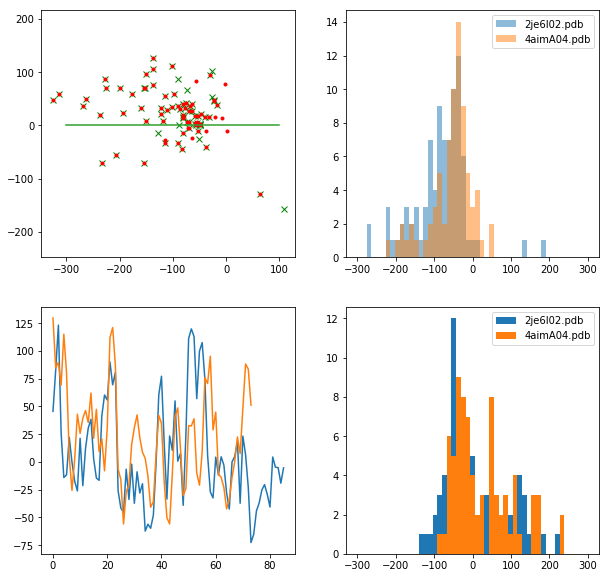

In [78]:
%matplotlib inline 
plt.close("all")
fig = plt.figure(figsize = [10,10])
ax1 = fig.add_subplot(221);
ax2 = fig.add_subplot(222);
ax3 = fig.add_subplot(223);
ax4 = fig.add_subplot(224);
print len(p1.DOPE_profile)
print len(p1.nDOPE_profile)
# ax1.hist(p1.DOPE_profile,np.linspace(-300,300,100));
for p in [p1,p2]:
    label = p.pdbname
#     ax1.plot(p.DOPE_profile,p.nDOPE_profile,'x',2,label = p.pdbname)
    ax2.hist(p.DOPE_profile,np.linspace(-300,300,50), label = p.pdbname,alpha = 0.5);
    smt_pf = np.convolve(p.nDOPE_profile, [1./3 for x in range(3)],'valid');
    ax3.plot(smt_pf, label = label)
    
#     ax3.plot(p.nDOPE_profile, label = label)
    ax4.hist(p.nDOPE_profile,np.linspace(-300,300,50), label = p.pdbname);

p.DOPE_profile
# ax1.plot(p.DOPE_profile,p.nDOPE_profile,'x',2,label = p.pdbname)

# if 1:
#     pos = aln.positions[10]
#     obj = pos
sx = 0;
sy = 0;
xs = [];
ys = [];
# for pos in aln.positions:
#     res1 = pos.get_residue(aln[0])
#     res2 = pos.get_residue(aln[1])
#     if res1 and res2:
#         rnum1 = res1._num
#         rnum2 = res2._num
for pos in positions:
    res1 = pos[0]
    res2 = pos[1]
    
    if res1[0] and res2[0]:
        rnum1 = res1[0];
        rnum2 = res2[0];
        dp1 = p1.DOPE_profile[(rnum1)]
        dp2 = p2.DOPE_profile[(rnum2)]
        x = (dp1+dp2)/np.sqrt(2);
        y = (dp2-dp1)/np.sqrt(2);
        xs += [x];
        ys += [y];
#         ax1.plot(x,y,'gx',2)
        sx += dp1;
        sy += dp2;
ax1.plot(xs,ys,'gx',2)

sx = 0;
sy = 0;
xs = [];
ys = [];
for pos in aln.positions:
    res1 = pos.get_residue(aln[0])
    res2 = pos.get_residue(aln[1])
    if res1 and res2:
        rnum1 = res1._num
        rnum2 = res2._num
        dp1 = p1.DOPE_profile[(rnum1)]
        dp2 = p2.DOPE_profile[(rnum2)]
        x = (dp1+dp2)/np.sqrt(2);
        y = (dp2-dp1)/np.sqrt(2);
        xs += [x];
        ys += [y];
#         ax1.plot(x,y,'gx',2)
        sx += dp1;
        sy += dp2;
ax1.plot(xs,ys,'r.',1)
# print(len(positions))
# xs =
print(sx)
print(sy)
ax1.plot([-300,100],[0,0])
ax1.axis('equal')
ax1.legend()
ax2.legend()
ax4.legend()

In [79]:
print(sum(ys))

1765.41206533


In [69]:
print rnum2
len(p2.DOPE_profile)

68


76

In [45]:
if [None,None]:
    print('hi')
# print(rnum2)
res2

hi


[622, 622]

In [44]:
# type(19 and None)
100 and 19

19

In [26]:
if int('0'):
    print('0')

In [61]:
# help(aln[0])
# dir(aln[0])
aln[0].atom_file
import os

def ssap(pdbfile1,pdbfile2):
    print os.environ['CATH_TOOLS_ALN_PATH']
    exec()
reload(os)
print os.environ['CATH_TOOLS_ALN_PATH']
bashCommand = "cath-ssap %s %s --aligndir %s" %(p1.pdbname,p2.pdbname,os.environ['CATH_TOOLS_ALN_PATH'] )
import subprocess
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output, error = process.communicate()
print(output)
positions = [];

with open(os.path.join(os.environ['CATH_TOOLS_ALN_PATH'],p1.pdbname + p2.pdbname +'.list')) as f:
    line = f.readline();
    res1 = -1;
    res2 = -1;
    while line:
        line = line.rstrip('\n')
#         print(line.split())
        lst = line.split(); 
        print(lst[0],lst[4],lst[-1])
        line = f.readline();
        
        col1 = int(lst[0]);
        colm = int(lst[4]);
        col2 = int(lst[-1]);
        if col1:
            res1 += 1;
            res1a = res1;
        else:
            col1 = None;
            res1a= None
        if col2:
            res2 += 1;
            res2a = res2;
        else:
            col2 = None;
            res2a= None;
        positions.append([[res1a ,col1],
                          [res2a ,col2],
                          colm,
                         ])
        
# f.open()
# from modeller import *
# modeller.sequence.Sequence
# sequence.Sequence()

/home/shouldsee/Documents/repos/cathdb/domchop/pdbs/alignments
2je6I02.pdb  4aimA04.pdb   88   76  81.35   76   86   21   2.89

('65', '0', '0')
('66', '0', '0')
('67', '0', '0')
('68', '0', '0')
('69', '23', '621')
('70', '24', '622')
('71', '23', '623')
('72', '10', '624')
('73', '0', '0')
('74', '36', '625')
('75', '41', '626')
('76', '50', '627')
('77', '59', '628')
('78', '59', '629')
('79', '65', '630')
('80', '80', '631')
('81', '77', '632')
('82', '66', '633')
('83', '69', '634')
('84', '58', '635')
('85', '45', '636')
('86', '29', '637')
('87', '64', '638')
('88', '73', '639')
('89', '71', '640')
('90', '67', '641')
('91', '65', '642')
('92', '52', '643')
('93', '46', '644')
('94', '22', '645')
('95', '4', '646')
('96', '25', '647')
('97', '56', '648')
('98', '54', '649')
('99', '56', '650')
('100', '61', '651')
('101', '47', '652')
('102', '42', '653')
('103', '40', '654')
('104', '42', '655')
('105', '45', '656')
('106', '18', '657')
('107', '27', '658')
('108', '14', '659')

In [48]:
15 and 100

100

In [37]:
None or False

False

In [28]:
bool(10)+5

6

In [172]:
# help(aln)
# aln.consensus(gap_penalties_1d=(0, 0.4), align_block=1)
# aln.consensus(aln[0],aln[1])
obj = aln.positions[0]
aln.check()
# dir(obj)
obj.get_residue(aln[0])
# obj.num
# aln[0].get_num_equiv()
# help(obj)
# obj.get_residue()


check_ali___> Checking the sequence-structure alignment. 

Implied intrachain target CA(i)-CA(i+1) distances longer than  8.0 angstroms:

ALN_POS  TMPL  RID1  RID2  NAM1  NAM2     DIST
----------------------------------------------
     66     1   52    56      V     L    8.528
     97     1   83    88      D     Q   11.532
END OF TABLE


Residue 1:I (type GLY)

In [92]:
env.io.atom_files_directory = ['.','../atom_files',input_dir]


# dir()
# from django.db.models import Avg,StdDev
# Variance()

NameError: name 'input_dir' is not defined

In [9]:
from django.db.models import Avg,StdDev
homsf_qset = classification.homsf_objects; 
homsf_qset = (homsf_qset.annotate(nDOPE_std=StdDev("classification__domain__nDOPE"))
              .annotate(nDOPE_avg=Avg("classification__domain__nDOPE"))
              .annotate(s35_count=Count("classification__parent__classification"))
             )

# homsf.count()
# domain.objects

In [11]:
homsf_list = classification.homsf_objects.filter( Q( nDOPE_avg>1.0 ) | Q( nDOPE_std>0.1 ))
homsf_list.count()

NameError: name 'nDOPE_avg' is not defined

In [8]:
# from django.conf.urls.static import static
from django.templatetags.static import static
static("imgs/rasamol.png")

'/static/imgs/rasamol.png'

In [2]:
from tst import views
# reverse(views.homsf_s35_collection,args = {"homsf_id":1})
reverse('domain_collection',args=['1.3.4.5'])



# help(reverse)

u'/tst/superfamily/1.3.4.5/'

In [10]:
homsf_qset = classification.homsf_objects.order_by("-s35_count","-nDOPE_avg");
homsf_qset[0].__dict__
# print(homsf_qset.manager)

{'Class': 2L,
 '_state': <django.db.models.base.ModelState at 0x7ff7f4300a50>,
 'arch': 60L,
 'homsf': 10L,
 'id': 309449L,
 'level_id': 5L,
 'nDOPE_avg': -1.3932344727840804,
 'nDOPE_std': 0.5276587358829742,
 'parent_id': 312905L,
 's100': 0L,
 's35': 0L,
 's35_count': 495616,
 's60': 0L,
 's95': 0L,
 'topo': 40L,
 'version_id': 1L}

In [9]:
d = domain.objects.all()[0]
hasattr(d,'superfamily')
getattr(d,'superfamily')

<bound method domain.superfamily of <domain: domain object>>

In [11]:
homsf_qset.__dict__

{'_db': None,
 '_fields': None,
 '_for_write': False,
 '_hints': {},
 '_iterable_class': django.db.models.query.ModelIterable,
 '_known_related_objects': {},
 '_prefetch_done': False,
 '_prefetch_related_lookups': (),
 '_result_cache': None,
 '_sticky_filter': False,
 'model': tst.models.classification,
 'query': <django.db.models.sql.query.Query at 0x7ff60c186b10>}

In [4]:
q = classification.objects.filter(Class=1,arch=20,topo=5,homsf=590,s35=0)

In [23]:
# dir(homsf_qset)
# homsf_qset.as_manager()

In [15]:
homsf_qset.model.__dict__

dict_proxy({'Class': <django.db.models.query_utils.DeferredAttribute at 0x7ff60c396290>,
            'DoesNotExist': tst.models.DoesNotExist,
            'MultipleObjectsReturned': tst.models.MultipleObjectsReturned,
            '__doc__': u'classification(id, Class, arch, topo, homsf, s35, s60, s95, s100, version, level, parent)',
            u'__module__': 'tst.models',
            '__str__': <function tst.models.__str__>,
            '_meta': <Options for classification>,
            'arch': <django.db.models.query_utils.DeferredAttribute at 0x7ff60c396250>,
            'classification_set': <django.db.models.fields.related_descriptors.ReverseManyToOneDescriptor at 0x7ff60c396410>,
            'domain_set': <django.db.models.fields.related_descriptors.ReverseManyToOneDescriptor at 0x7ff60c396d50>,
            'find_depth': <function tst.models.find_depth>,
            'get_s35cnt': <function tst.models.get_s35cnt>,
            'homsf': <django.db.models.query_utils.DeferredAttribute

In [6]:
q[0]

In [7]:
q[0].classification_set

In [8]:
q[0].classification_set.all()

In [9]:
q = classification.objects.filter(Class=1,arch=10,topo=8,homsf=10)

In [10]:
q[9]

In [11]:
q[1]

In [12]:
q[2]

In [13]:
q[3]

In [14]:
q = classification.objects.filter(Class=1,arch=10,topo=8,homsf=10,s35=0)

In [15]:
q

In [16]:
q[0]

In [17]:
q[0].classification_set()

In [18]:
q[0].classification_set.all()

In [19]:
s = q[0].classification_set.all()

In [20]:
len(s)

In [21]:
q = classification.objects.filter(Class=1,arch=10,topo=8,homsf=10,s35=0)

In [22]:
q

In [23]:
q[0]

In [24]:
q[0].classification_set

In [25]:
q[0].classification_set.all()

In [26]:
d = q[0].classification_set.all()

In [27]:
d

In [28]:
len(d)

In [29]:
d.filter()

In [30]:
dd = d.filter(Class=1)

In [31]:
len(dd)

In [32]:
len(d)

In [33]:
q[0].parent

In [34]:
q[0].parent.parent

In [35]:
q[0]

In [36]:
q = classification.objects.filter(Class=1,arch=10,topo=8,homsf=10,s35
    ...: =0)

In [37]:
q

In [38]:
q[0].class

In [39]:
q[0]

In [40]:
d=q[0]

In [41]:
d

In [42]:
sf=q[0]

In [43]:
sf.classification_set

In [44]:
sf.classification_set.all()

In [45]:
dq=sf.classification_set.all()

In [46]:
len(dq)

In [47]:
dq.filter(Class=2)

In [48]:
0 or 1

In [49]:
0 or 1 or 3

In [50]:
q

In [51]:
d

In [52]:
d.node_dict()

In [53]:
d.s100=0

In [54]:
d.node_dict()

In [55]:
classification.objects.filter(**d.node_dict())

In [56]:
d.s100=1

In [57]:
classification.objects.filter(**d.node_dict())

In [58]:
d

In [59]:
d

In [60]:
d

In [61]:
d.parent

In [62]:
		c = classification.objects.get(
			Class=next(lst,0),
			arch=next(lst,0),
			topo=next(lst,0),
			homsf=next(lst,0),
			s35=next(lst,0),
			s60=next(lst,0),
			s95=next(lst,0),
			s100=next(lst,0),
			version__name='v4_1_0'
			)

In [63]:
node = '1.10.10.10'
		lst = (int(x) for x in node.split('.'))
		c = classification.objects.get(
			Class=next(lst,0),
			arch=next(lst,0),
			topo=next(lst,0),
			homsf=next(lst,0),
			s35=next(lst,0),
			s60=next(lst,0),
			s95=next(lst,0),
			s100=next(lst,0),
			version__name='v4_1_0'
			)

In [64]:
		node = '1.10.10.10'
		lst = (int(x) for x in node.split('.'))
		c = classification.objects.get(
			Class=next(lst,0),
			arch=next(lst,0),
			topo=next(lst,0),
			homsf=next(lst,0),
			s35=next(lst,0),
			s60=next(lst,0),
			s95=next(lst,0),
			s100=next(lst,0),
			version__name='v4_1_0'
			)

In [65]:
c

In [66]:
c.classification_set.all()

In [67]:
q = c.classification_set.all()

In [68]:
len(q)

In [69]:
domains.objects.get(domain_id="2cusA01")

In [70]:
domain.objects.get(domain_id="2cusA01")

In [71]:
domain.objects.get(domain_id="2c7wA00")

In [72]:
d = domain.objects.get(domain_id="2c7wA00")

In [73]:
d

In [74]:
d.__dict__

In [75]:
d

In [76]:
d.parent

In [77]:
d.classification

In [78]:
s35 = d.classification

In [79]:
s35.parent

In [80]:
s35.parent.classification_set()

In [81]:
s35.parent.classification_set.all()

In [82]:
sf.parent.classification_set.all()

In [83]:
sf=s35;

In [84]:
s35 = sf.parent.classification_set.all()

In [85]:
s35

In [86]:
len(s35)

In [87]:
for i in s35;

In [88]:
for i in s35:
    print(i)
    

In [89]:
from django.db.models import Avg

In [90]:
s35.aggregate(Avg('nDOPE'))

In [91]:
s35.aggregate(Avg('domian__nDOPE'))

In [92]:
from django.db.models import Avg,Count

In [93]:
domain.objects.filter(nDOPE__gte=1.5)

In [94]:
dset = domain.objects.filter(nDOPE__gte=1.5)

In [95]:
dset.annotate(s35cnt=Count('classification__parent__classification'))

In [96]:
dset = dset.annotate(s35cnt=Count('classification__parent__classification'))

In [97]:
dset[0].__dict__

In [98]:
sfset = classification.objects.filter(level_id=5)

In [99]:
sfset.count()

In [100]:
sfset

In [101]:
sfset.annotate(mean_s35_nDOPE=Avg('classification__domain__nDOPE'))

In [102]:
sfset = sfset.annotate(mean_s35_nDOPE=Avg('classification__domain__nDOPE'))

In [103]:
sfset[0].mean_s35_nDOPE

In [104]:
reload(models)

In [105]:
reload(classification)

In [106]:
reload(tst.models)

In [107]:
reload(tst)

In [108]:
import sys

In [109]:
reload(sys.modules['tst.models'])

In [110]:
unload(sys.modules['tst.models'])

In [111]:
reload(sys.modules['tst.models'])

In [112]:
classification.homsf_objects

In [113]:
%save debug.ipynb